[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/02_1_Compare_Loss_Function_Regression.ipynb)

# 02_01 Comparison of Different Loss Function Regression


## 1. Data Preprocessing

In [3]:
!wget https://raw.githubusercontent.com/redcican/Master-Thesis/master/FFS_01433.csv

--2018-06-15 10:03:28--  https://raw.githubusercontent.com/redcican/Master-Thesis/master/FFS_01433.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14378532 (14M) [text/plain]
Saving to: ‘FFS_01433.csv.1’

FFS_01433.csv.1     100%[===================>]  13.71M  --.-KB/s    in 0.09s   

2018-06-15 10:03:29 (156 MB/s) - ‘FFS_01433.csv.1’ saved [14378532/14378532]



## 3. Building the Neural Network

In [0]:
%matplotlib inline
%config InlineBacken.figure_format='retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, initializers
from keras import optimizers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import losses

Using TensorFlow backend.


In [6]:
rawdf = pd.read_csv('FFS_01433.csv')
rawdf.head()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
0,33.39,36.24,27.68,25.24,19.23,18.15,22.40,41.06,40.67,41.43,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
1,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
2,27.72,31.35,30.80,25.55,20.82,22.28,20.66,31.29,34.35,33.95,...,30.11,29.02,26.32,18.23,18.10,21.34,40.32,41.33,35.51,107.5
3,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,25.82,26.96,27.24,19.44,18.20,21.10,32.18,37.47,39.98,107.5
4,32.33,28.40,24.78,27.88,20.32,17.44,21.35,41.28,40.31,38.46,...,30.45,29.61,37.12,18.79,23.47,19.89,44.17,32.37,46.24,107.5


In [7]:
pd.options.display.float_format='{:,.2f}'.format
rawdf.describe()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
count,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00",...,"58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00","58,905.00"
mean,30.03,29.06,29.97,28.55,20.21,19.55,19.93,39.96,41.69,40.70,...,30.55,28.31,29.86,21.24,20.15,19.95,39.42,38.59,40.49,116.55
std,2.82,3.23,2.67,2.52,1.55,1.49,1.93,4.03,4.14,3.94,...,3.45,1.97,3.42,2.97,1.95,1.62,3.30,3.81,3.91,4.09
min,23.22,22.73,24.78,23.81,17.18,15.69,15.49,31.29,32.37,32.32,...,22.73,25.76,23.81,17.18,15.69,15.49,31.29,32.37,32.32,107.50
25%,28.91,27.62,27.68,26.40,18.94,18.76,18.68,35.34,38.23,36.81,...,27.32,26.74,27.24,19.01,19.26,18.77,37.83,33.82,39.03,113.72
50%,30.54,29.70,30.21,28.28,20.32,19.36,20.76,41.06,40.67,40.54,...,30.16,28.45,30.25,20.17,20.52,19.97,39.81,39.42,40.99,116.53
75%,32.33,30.73,31.83,29.94,21.45,20.97,21.35,41.98,44.66,43.28,...,34.25,29.08,31.51,22.29,21.91,21.34,41.41,41.71,43.01,119.63
max,35.27,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,...,36.24,35.66,37.12,27.14,23.47,23.02,49.65,50.00,50.00,130.79


In [0]:
df = rawdf.copy()

#feature scale
ss = MinMaxScaler()
scale_features = ['I1','I2','I3','I4','I5','I6','I7','I8','I9','I10',
                 'I11','I12','I13','I14','I15','I16','I17','I18','I19','I20',
                 'I21','I22','I23','I24','I25','I26','I27','I28','I29','I30',
                 'I31','I32','I33','I34','I35','I36','I37','I38','I39','I40','D']
df[scale_features] = ss.fit_transform(df[scale_features])

In [9]:
df.tail()

,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,...,I32,I33,I34,I35,I36,I37,I38,I39,I40,D
58900,0.79,0.63,0.65,0.34,0.34,0.72,0.34,1.00,0.70,0.25,...,0.54,0.27,0.58,0.51,0.62,0.82,0.25,0.63,0.60,0.91
58901,0.58,0.00,0.60,0.92,0.00,0.03,0.18,0.68,0.31,0.56,...,0.33,0.10,0.48,0.44,0.69,0.89,0.38,0.40,0.48,0.92
58902,0.00,0.59,0.48,0.40,0.18,0.40,0.78,0.48,0.84,0.73,...,0.66,0.03,0.73,0.23,0.80,0.59,0.46,0.47,0.66,0.95
58903,0.79,0.18,0.77,0.46,0.11,0.69,0.52,0.58,0.33,0.46,...,0.66,0.03,0.73,0.23,0.80,0.59,0.46,0.47,0.66,0.95
58904,0.00,0.59,0.48,0.40,0.18,0.40,0.78,0.48,0.84,0.73,...,0.73,0.51,0.20,0.41,0.14,0.72,0.54,0.49,0.55,1.00


In [10]:
X = df.drop(['D'],axis=1).values
Y = (df['D'].values).reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, Y_train.shape, X_test.shape,Y_test.shape)

(47124, 40) (47124, 1) (11781, 40) (11781, 1)


In [0]:
epochs = 100
batch_size = 256

In [0]:
def model(loss):
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  
  model.compile(loss=loss,
               optimizer='adam',metrics=['mae'])
  
  return model

### 3.1 Loss = Mean Squared Error





In [0]:
loss_1 =losses.mean_squared_error

In [14]:
start = time.time()
model_1 = model(loss_1)
model_1_history = model_1.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 2s - loss: 0.0389 - mean_absolute_error: 0.1503 - val_loss: 0.0169 - val_mean_absolute_error: 0.1044
Epoch 2/100
 - 1s - loss: 0.0153 - mean_absolute_error: 0.0990 - val_loss: 0.0151 - val_mean_absolute_error: 0.0991
Epoch 3/100
 - 1s - loss: 0.0139 - mean_absolute_error: 0.0945 - val_loss: 0.0145 - val_mean_absolute_error: 0.0972
Epoch 4/100
 - 1s - loss: 0.0131 - mean_absolute_error: 0.0919 - val_loss: 0.0131 - val_mean_absolute_error: 0.0923
Epoch 5/100
 - 1s - loss: 0.0126 - mean_absolute_error: 0.0901 - val_loss: 0.0139 - val_mean_absolute_error: 0.0933
Epoch 6/100
 - 1s - loss: 0.0121 - mean_absolute_error: 0.0882 - val_loss: 0.0129 - val_mean_absolute_error: 0.0920
Epoch 7/100
 - 1s - loss: 0.0119 - mean_absolute_error: 0.0872 - val_loss: 0.0122 - val_mean_absolute_error: 0.0889
Epoch 8/100
 - 1s - loss: 0.0115 - mean_absolute_error: 0.0855 - val_loss: 0.0117 - val_mean_absolute_error: 0.0862
Epoch 9/100
 - 1s - lo

 - 1s - loss: 0.0089 - mean_absolute_error: 0.0745 - val_loss: 0.0097 - val_mean_absolute_error: 0.0768
Epoch 30/100
 - 1s - loss: 0.0089 - mean_absolute_error: 0.0744 - val_loss: 0.0094 - val_mean_absolute_error: 0.0772
Epoch 31/100
 - 1s - loss: 0.0087 - mean_absolute_error: 0.0737 - val_loss: 0.0092 - val_mean_absolute_error: 0.0753
Epoch 32/100
 - 1s - loss: 0.0087 - mean_absolute_error: 0.0735 - val_loss: 0.0097 - val_mean_absolute_error: 0.0788
Epoch 33/100
 - 1s - loss: 0.0086 - mean_absolute_error: 0.0733 - val_loss: 0.0092 - val_mean_absolute_error: 0.0747
Epoch 34/100
 - 1s - loss: 0.0086 - mean_absolute_error: 0.0728 - val_loss: 0.0091 - val_mean_absolute_error: 0.0751
Epoch 35/100
 - 1s - loss: 0.0085 - mean_absolute_error: 0.0724 - val_loss: 0.0091 - val_mean_absolute_error: 0.0756
Epoch 36/100
 - 1s - loss: 0.0084 - mean_absolute_error: 0.0723 - val_loss: 0.0092 - val_mean_absolute_error: 0.0749
Epoch 37/100
 - 1s - loss: 0.0084 - mean_absolute_error: 0.0722 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0689 - val_loss: 0.0084 - val_mean_absolute_error: 0.0720
Epoch 59/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0689 - val_loss: 0.0085 - val_mean_absolute_error: 0.0725
Epoch 60/100
 - 1s - loss: 0.0077 - mean_absolute_error: 0.0685 - val_loss: 0.0086 - val_mean_absolute_error: 0.0724
Epoch 61/100
 - 1s - loss: 0.0076 - mean_absolute_error: 0.0681 - val_loss: 0.0084 - val_mean_absolute_error: 0.0714
Epoch 62/100
 - 1s - loss: 0.0076 - mean_absolute_error: 0.0681 - val_loss: 0.0086 - val_mean_absolute_error: 0.0717
Epoch 63/100
 - 1s - loss: 0.0076 - mean_absolute_error: 0.0680 - val_loss: 0.0084 - val_mean_absolute_error: 0.0714
Epoch 64/100
 - 1s - loss: 0.0076 - mean_absolute_error: 0.0679 - val_loss: 0.0085 - val_mean_absolute_error: 0.0721
Epoch 65/100
 - 1s - loss: 0.0076 - mean_absolute_error: 0.0683 - val_loss: 0.0085 - val_mean_absolute_error: 0.0717
Epoch 66/100
 - 1s - loss: 0.0076 - mean_absolute_error: 0.0681 

Epoch 87/100
 - 1s - loss: 0.0072 - mean_absolute_error: 0.0662 - val_loss: 0.0088 - val_mean_absolute_error: 0.0714
Epoch 88/100
 - 1s - loss: 0.0072 - mean_absolute_error: 0.0660 - val_loss: 0.0083 - val_mean_absolute_error: 0.0700
Epoch 89/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0658 - val_loss: 0.0082 - val_mean_absolute_error: 0.0713
Epoch 90/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0657 - val_loss: 0.0082 - val_mean_absolute_error: 0.0697
Epoch 91/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0657 - val_loss: 0.0086 - val_mean_absolute_error: 0.0712
Epoch 92/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0657 - val_loss: 0.0083 - val_mean_absolute_error: 0.0704
Epoch 93/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0658 - val_loss: 0.0082 - val_mean_absolute_error: 0.0702
Epoch 94/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0653 - val_loss: 0.0083 - val_mean_absolute_error: 0.0703
Epoch 95/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0658 

In [15]:
train_loss_1 = model_1.evaluate(X_train, Y_train, verbose=0)[0]
print("Training loss " ,(train_loss_1))
test_loss_1 = model_1.evaluate(X_test, Y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_1))

Training loss  0.007109158859826867
Testing loss 0.008397154769868192


### 3.2 Loss = mean_absolute_error

In [0]:
loss_2 =losses.mean_absolute_error

In [17]:
start = time.time()
model_2 = model(loss_2)
model_2_history = model_2.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 2s - loss: 0.1293 - mean_absolute_error: 0.1293 - val_loss: 0.1007 - val_mean_absolute_error: 0.1007
Epoch 2/100
 - 1s - loss: 0.0966 - mean_absolute_error: 0.0966 - val_loss: 0.0951 - val_mean_absolute_error: 0.0951
Epoch 3/100
 - 1s - loss: 0.0919 - mean_absolute_error: 0.0919 - val_loss: 0.0919 - val_mean_absolute_error: 0.0919
Epoch 4/100
 - 1s - loss: 0.0891 - mean_absolute_error: 0.0891 - val_loss: 0.0894 - val_mean_absolute_error: 0.0894
Epoch 5/100
 - 1s - loss: 0.0876 - mean_absolute_error: 0.0876 - val_loss: 0.0999 - val_mean_absolute_error: 0.0999
Epoch 6/100
 - 1s - loss: 0.0862 - mean_absolute_error: 0.0862 - val_loss: 0.0865 - val_mean_absolute_error: 0.0865
Epoch 7/100
 - 1s - loss: 0.0845 - mean_absolute_error: 0.0845 - val_loss: 0.0901 - val_mean_absolute_error: 0.0901
Epoch 8/100
 - 1s - loss: 0.0832 - mean_absolute_error: 0.0832 - val_loss: 0.0857 - val_mean_absolute_error: 0.0857
Epoch 9/100
 - 1s - lo

 - 1s - loss: 0.0726 - mean_absolute_error: 0.0726 - val_loss: 0.0740 - val_mean_absolute_error: 0.0740
Epoch 30/100
 - 1s - loss: 0.0723 - mean_absolute_error: 0.0723 - val_loss: 0.0756 - val_mean_absolute_error: 0.0756
Epoch 31/100
 - 1s - loss: 0.0718 - mean_absolute_error: 0.0718 - val_loss: 0.0749 - val_mean_absolute_error: 0.0749
Epoch 32/100
 - 1s - loss: 0.0714 - mean_absolute_error: 0.0714 - val_loss: 0.0748 - val_mean_absolute_error: 0.0748
Epoch 33/100
 - 1s - loss: 0.0712 - mean_absolute_error: 0.0712 - val_loss: 0.0752 - val_mean_absolute_error: 0.0752
Epoch 34/100
 - 1s - loss: 0.0715 - mean_absolute_error: 0.0715 - val_loss: 0.0845 - val_mean_absolute_error: 0.0845
Epoch 35/100
 - 1s - loss: 0.0713 - mean_absolute_error: 0.0713 - val_loss: 0.0727 - val_mean_absolute_error: 0.0727
Epoch 36/100
 - 1s - loss: 0.0708 - mean_absolute_error: 0.0708 - val_loss: 0.0731 - val_mean_absolute_error: 0.0731
Epoch 37/100
 - 1s - loss: 0.0705 - mean_absolute_error: 0.0705 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0669 - mean_absolute_error: 0.0669 - val_loss: 0.0696 - val_mean_absolute_error: 0.0696
Epoch 59/100
 - 1s - loss: 0.0665 - mean_absolute_error: 0.0665 - val_loss: 0.0726 - val_mean_absolute_error: 0.0726
Epoch 60/100
 - 1s - loss: 0.0666 - mean_absolute_error: 0.0666 - val_loss: 0.0699 - val_mean_absolute_error: 0.0699
Epoch 61/100
 - 1s - loss: 0.0663 - mean_absolute_error: 0.0663 - val_loss: 0.0692 - val_mean_absolute_error: 0.0692
Epoch 62/100
 - 1s - loss: 0.0662 - mean_absolute_error: 0.0662 - val_loss: 0.0722 - val_mean_absolute_error: 0.0722
Epoch 63/100
 - 1s - loss: 0.0659 - mean_absolute_error: 0.0659 - val_loss: 0.0695 - val_mean_absolute_error: 0.0695
Epoch 64/100
 - 1s - loss: 0.0659 - mean_absolute_error: 0.0659 - val_loss: 0.0701 - val_mean_absolute_error: 0.0701
Epoch 65/100
 - 1s - loss: 0.0662 - mean_absolute_error: 0.0662 - val_loss: 0.0688 - val_mean_absolute_error: 0.0688
Epoch 66/100
 - 1s - loss: 0.0658 - mean_absolute_error: 0.0658 

Epoch 87/100
 - 1s - loss: 0.0644 - mean_absolute_error: 0.0644 - val_loss: 0.0695 - val_mean_absolute_error: 0.0695
Epoch 88/100
 - 1s - loss: 0.0638 - mean_absolute_error: 0.0638 - val_loss: 0.0690 - val_mean_absolute_error: 0.0690
Epoch 89/100
 - 1s - loss: 0.0637 - mean_absolute_error: 0.0637 - val_loss: 0.0687 - val_mean_absolute_error: 0.0687
Epoch 90/100
 - 1s - loss: 0.0638 - mean_absolute_error: 0.0638 - val_loss: 0.0683 - val_mean_absolute_error: 0.0683
Epoch 91/100
 - 1s - loss: 0.0634 - mean_absolute_error: 0.0634 - val_loss: 0.0676 - val_mean_absolute_error: 0.0676
Epoch 92/100
 - 1s - loss: 0.0633 - mean_absolute_error: 0.0633 - val_loss: 0.0687 - val_mean_absolute_error: 0.0687
Epoch 93/100
 - 1s - loss: 0.0636 - mean_absolute_error: 0.0636 - val_loss: 0.0685 - val_mean_absolute_error: 0.0685
Epoch 94/100
 - 1s - loss: 0.0636 - mean_absolute_error: 0.0636 - val_loss: 0.0680 - val_mean_absolute_error: 0.0680
Epoch 95/100
 - 1s - loss: 0.0630 - mean_absolute_error: 0.0630 

In [18]:
train_loss_2 = model_2.evaluate(X_train, Y_train, verbose=0)[0]
print("Training loss " ,(train_loss_2))
test_loss_2 = model_2.evaluate(X_test, Y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_2))

Training loss  0.06456687677309819
Testing loss 0.06952108456886398


### 3.4 loss = mean_squared_logarithmic_error


In [0]:
loss_4 =losses.mean_squared_logarithmic_error

In [20]:
start = time.time()
model_4 = model(loss_4)
model_4_history = model_4.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 2s - loss: 0.0141 - mean_absolute_error: 0.1252 - val_loss: 0.0085 - val_mean_absolute_error: 0.1026
Epoch 2/100
 - 1s - loss: 0.0078 - mean_absolute_error: 0.0971 - val_loss: 0.0075 - val_mean_absolute_error: 0.0957
Epoch 3/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0926 - val_loss: 0.0069 - val_mean_absolute_error: 0.0917
Epoch 4/100
 - 1s - loss: 0.0066 - mean_absolute_error: 0.0898 - val_loss: 0.0066 - val_mean_absolute_error: 0.0899
Epoch 5/100
 - 1s - loss: 0.0063 - mean_absolute_error: 0.0871 - val_loss: 0.0065 - val_mean_absolute_error: 0.0888
Epoch 6/100
 - 1s - loss: 0.0060 - mean_absolute_error: 0.0855 - val_loss: 0.0059 - val_mean_absolute_error: 0.0850
Epoch 7/100
 - 1s - loss: 0.0058 - mean_absolute_error: 0.0835 - val_loss: 0.0060 - val_mean_absolute_error: 0.0855
Epoch 8/100
 - 1s - loss: 0.0056 - mean_absolute_error: 0.0824 - val_loss: 0.0056 - val_mean_absolute_error: 0.0822
Epoch 9/100
 - 1s - lo

 - 1s - loss: 0.0043 - mean_absolute_error: 0.0713 - val_loss: 0.0045 - val_mean_absolute_error: 0.0734
Epoch 30/100
 - 1s - loss: 0.0042 - mean_absolute_error: 0.0709 - val_loss: 0.0050 - val_mean_absolute_error: 0.0760
Epoch 31/100
 - 1s - loss: 0.0042 - mean_absolute_error: 0.0704 - val_loss: 0.0045 - val_mean_absolute_error: 0.0732
Epoch 32/100
 - 1s - loss: 0.0042 - mean_absolute_error: 0.0705 - val_loss: 0.0046 - val_mean_absolute_error: 0.0740
Epoch 33/100
 - 1s - loss: 0.0042 - mean_absolute_error: 0.0702 - val_loss: 0.0046 - val_mean_absolute_error: 0.0739
Epoch 34/100
 - 1s - loss: 0.0041 - mean_absolute_error: 0.0698 - val_loss: 0.0045 - val_mean_absolute_error: 0.0727
Epoch 35/100
 - 1s - loss: 0.0041 - mean_absolute_error: 0.0696 - val_loss: 0.0045 - val_mean_absolute_error: 0.0724
Epoch 36/100
 - 1s - loss: 0.0041 - mean_absolute_error: 0.0694 - val_loss: 0.0045 - val_mean_absolute_error: 0.0734
Epoch 37/100
 - 1s - loss: 0.0041 - mean_absolute_error: 0.0695 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0038 - mean_absolute_error: 0.0663 - val_loss: 0.0044 - val_mean_absolute_error: 0.0728
Epoch 59/100
 - 1s - loss: 0.0038 - mean_absolute_error: 0.0664 - val_loss: 0.0043 - val_mean_absolute_error: 0.0716
Epoch 60/100
 - 1s - loss: 0.0038 - mean_absolute_error: 0.0662 - val_loss: 0.0042 - val_mean_absolute_error: 0.0700
Epoch 61/100
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0660 - val_loss: 0.0043 - val_mean_absolute_error: 0.0715
Epoch 62/100
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0657 - val_loss: 0.0042 - val_mean_absolute_error: 0.0702
Epoch 63/100
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0661 - val_loss: 0.0042 - val_mean_absolute_error: 0.0698
Epoch 64/100
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0656 - val_loss: 0.0041 - val_mean_absolute_error: 0.0696
Epoch 65/100
 - 1s - loss: 0.0036 - mean_absolute_error: 0.0653 - val_loss: 0.0043 - val_mean_absolute_error: 0.0700
Epoch 66/100
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0657 

Epoch 87/100
 - 1s - loss: 0.0036 - mean_absolute_error: 0.0643 - val_loss: 0.0043 - val_mean_absolute_error: 0.0694
Epoch 88/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0641 - val_loss: 0.0041 - val_mean_absolute_error: 0.0687
Epoch 89/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0639 - val_loss: 0.0042 - val_mean_absolute_error: 0.0686
Epoch 90/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0640 - val_loss: 0.0041 - val_mean_absolute_error: 0.0681
Epoch 91/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0638 - val_loss: 0.0042 - val_mean_absolute_error: 0.0692
Epoch 92/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0639 - val_loss: 0.0044 - val_mean_absolute_error: 0.0728
Epoch 93/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0637 - val_loss: 0.0042 - val_mean_absolute_error: 0.0706
Epoch 94/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0638 - val_loss: 0.0042 - val_mean_absolute_error: 0.0689
Epoch 95/100
 - 1s - loss: 0.0034 - mean_absolute_error: 0.0633 

In [21]:
train_loss_4 = model_4.evaluate(X_train, Y_train, verbose=0)[0]
print("Training loss " ,(train_loss_4))
test_loss_4 = model_1.evaluate(X_test, Y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_4))

Training loss  0.0035879820397381563
Testing loss 0.008397154769868192


### 3.8 loss = logcosh

In [0]:
loss_8 = losses.logcosh

In [29]:
start = time.time()
model_8 = model(loss_8)
model_8_history = model_8.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test,Y_test))
print('@ Total Time Spent: %.2f seconds' %(time.time()-start))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 2s - loss: 0.0219 - mean_absolute_error: 0.1593 - val_loss: 0.0089 - val_mean_absolute_error: 0.1076
Epoch 2/100
 - 1s - loss: 0.0079 - mean_absolute_error: 0.1008 - val_loss: 0.0078 - val_mean_absolute_error: 0.1008
Epoch 3/100
 - 1s - loss: 0.0071 - mean_absolute_error: 0.0959 - val_loss: 0.0071 - val_mean_absolute_error: 0.0962
Epoch 4/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0930 - val_loss: 0.0068 - val_mean_absolute_error: 0.0935
Epoch 5/100
 - 1s - loss: 0.0065 - mean_absolute_error: 0.0913 - val_loss: 0.0066 - val_mean_absolute_error: 0.0918
Epoch 6/100
 - 1s - loss: 0.0062 - mean_absolute_error: 0.0891 - val_loss: 0.0064 - val_mean_absolute_error: 0.0906
Epoch 7/100
 - 1s - loss: 0.0060 - mean_absolute_error: 0.0879 - val_loss: 0.0062 - val_mean_absolute_error: 0.0887
Epoch 8/100
 - 1s - loss: 0.0059 - mean_absolute_error: 0.0867 - val_loss: 0.0060 - val_mean_absolute_error: 0.0875
Epoch 9/100
 - 1s - lo

 - 1s - loss: 0.0045 - mean_absolute_error: 0.0746 - val_loss: 0.0048 - val_mean_absolute_error: 0.0771
Epoch 30/100
 - 1s - loss: 0.0044 - mean_absolute_error: 0.0739 - val_loss: 0.0049 - val_mean_absolute_error: 0.0779
Epoch 31/100
 - 1s - loss: 0.0044 - mean_absolute_error: 0.0740 - val_loss: 0.0049 - val_mean_absolute_error: 0.0786
Epoch 32/100
 - 1s - loss: 0.0043 - mean_absolute_error: 0.0734 - val_loss: 0.0050 - val_mean_absolute_error: 0.0802
Epoch 33/100
 - 1s - loss: 0.0043 - mean_absolute_error: 0.0734 - val_loss: 0.0049 - val_mean_absolute_error: 0.0771
Epoch 34/100
 - 1s - loss: 0.0043 - mean_absolute_error: 0.0731 - val_loss: 0.0046 - val_mean_absolute_error: 0.0762
Epoch 35/100
 - 1s - loss: 0.0043 - mean_absolute_error: 0.0729 - val_loss: 0.0049 - val_mean_absolute_error: 0.0769
Epoch 36/100
 - 1s - loss: 0.0042 - mean_absolute_error: 0.0723 - val_loss: 0.0046 - val_mean_absolute_error: 0.0751
Epoch 37/100
 - 1s - loss: 0.0042 - mean_absolute_error: 0.0721 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0038 - mean_absolute_error: 0.0677 - val_loss: 0.0043 - val_mean_absolute_error: 0.0723
Epoch 59/100
 - 1s - loss: 0.0038 - mean_absolute_error: 0.0679 - val_loss: 0.0048 - val_mean_absolute_error: 0.0784
Epoch 60/100
 - 1s - loss: 0.0038 - mean_absolute_error: 0.0679 - val_loss: 0.0044 - val_mean_absolute_error: 0.0750
Epoch 61/100
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0676 - val_loss: 0.0045 - val_mean_absolute_error: 0.0746
Epoch 62/100
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0674 - val_loss: 0.0042 - val_mean_absolute_error: 0.0721
Epoch 63/100
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0675 - val_loss: 0.0046 - val_mean_absolute_error: 0.0764
Epoch 64/100
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0672 - val_loss: 0.0042 - val_mean_absolute_error: 0.0714
Epoch 65/100
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0670 - val_loss: 0.0042 - val_mean_absolute_error: 0.0707
Epoch 66/100
 - 1s - loss: 0.0037 - mean_absolute_error: 0.0669 

Epoch 87/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0647 - val_loss: 0.0041 - val_mean_absolute_error: 0.0703
Epoch 88/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0646 - val_loss: 0.0041 - val_mean_absolute_error: 0.0695
Epoch 89/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0649 - val_loss: 0.0041 - val_mean_absolute_error: 0.0703
Epoch 90/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0650 - val_loss: 0.0040 - val_mean_absolute_error: 0.0691
Epoch 91/100
 - 1s - loss: 0.0034 - mean_absolute_error: 0.0645 - val_loss: 0.0044 - val_mean_absolute_error: 0.0720
Epoch 92/100
 - 1s - loss: 0.0034 - mean_absolute_error: 0.0646 - val_loss: 0.0041 - val_mean_absolute_error: 0.0694
Epoch 93/100
 - 1s - loss: 0.0035 - mean_absolute_error: 0.0648 - val_loss: 0.0040 - val_mean_absolute_error: 0.0696
Epoch 94/100
 - 1s - loss: 0.0034 - mean_absolute_error: 0.0644 - val_loss: 0.0040 - val_mean_absolute_error: 0.0689
Epoch 95/100
 - 1s - loss: 0.0034 - mean_absolute_error: 0.0643 

In [30]:
train_loss_8 = model_8.evaluate(X_train, Y_train, verbose=0)[0]
print("Training loss " ,(train_loss_8))
test_loss_8 = model_8.evaluate(X_test, Y_test, verbose=0)[0]
print("Testing loss" ,(test_loss_8))

Training loss  0.003443808032614136
Testing loss 0.0041259692192851406


### 3.9 loss = RMSE

In [0]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [0]:
loss_9 = root_mean_squared_error

In [46]:
model_9 = model(loss_9)
model_9_history = model_1.fit(X_train, Y_train,
                             batch_size = batch_size,
                             epochs = epochs,
                             verbose = 2,
                             validation_data = (X_test, Y_test))

Train on 47124 samples, validate on 11781 samples
Epoch 1/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0651 - val_loss: 0.0083 - val_mean_absolute_error: 0.0701
Epoch 2/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0649 - val_loss: 0.0080 - val_mean_absolute_error: 0.0696
Epoch 3/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0650 - val_loss: 0.0082 - val_mean_absolute_error: 0.0697
Epoch 4/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0651 - val_loss: 0.0084 - val_mean_absolute_error: 0.0703
Epoch 5/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0653 - val_loss: 0.0081 - val_mean_absolute_error: 0.0694
Epoch 6/100
 - 1s - loss: 0.0070 - mean_absolute_error: 0.0649 - val_loss: 0.0084 - val_mean_absolute_error: 0.0701
Epoch 7/100
 - 1s - loss: 0.0069 - mean_absolute_error: 0.0648 - val_loss: 0.0081 - val_mean_absolute_error: 0.0697
Epoch 8/100
 - 1s - loss: 0.0069 - mean_absolute_error: 0.0647 - val_loss: 0.0080 - val_mean_absolute_error: 0.0698
Epoch 9/100
 - 1s - lo

 - 1s - loss: 0.0067 - mean_absolute_error: 0.0637 - val_loss: 0.0083 - val_mean_absolute_error: 0.0706
Epoch 30/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0638 - val_loss: 0.0081 - val_mean_absolute_error: 0.0697
Epoch 31/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0635 - val_loss: 0.0081 - val_mean_absolute_error: 0.0699
Epoch 32/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0635 - val_loss: 0.0083 - val_mean_absolute_error: 0.0696
Epoch 33/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0634 - val_loss: 0.0080 - val_mean_absolute_error: 0.0689
Epoch 34/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0637 - val_loss: 0.0084 - val_mean_absolute_error: 0.0703
Epoch 35/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0632 - val_loss: 0.0081 - val_mean_absolute_error: 0.0691
Epoch 36/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0635 - val_loss: 0.0080 - val_mean_absolute_error: 0.0692
Epoch 37/100
 - 1s - loss: 0.0067 - mean_absolute_error: 0.0635 - val_loss: 0

Epoch 58/100
 - 1s - loss: 0.0065 - mean_absolute_error: 0.0627 - val_loss: 0.0080 - val_mean_absolute_error: 0.0695
Epoch 59/100
 - 1s - loss: 0.0065 - mean_absolute_error: 0.0623 - val_loss: 0.0080 - val_mean_absolute_error: 0.0695
Epoch 60/100
 - 1s - loss: 0.0065 - mean_absolute_error: 0.0623 - val_loss: 0.0081 - val_mean_absolute_error: 0.0695
Epoch 61/100
 - 1s - loss: 0.0064 - mean_absolute_error: 0.0622 - val_loss: 0.0079 - val_mean_absolute_error: 0.0685
Epoch 62/100
 - 1s - loss: 0.0065 - mean_absolute_error: 0.0627 - val_loss: 0.0080 - val_mean_absolute_error: 0.0686
Epoch 63/100
 - 1s - loss: 0.0065 - mean_absolute_error: 0.0622 - val_loss: 0.0085 - val_mean_absolute_error: 0.0697
Epoch 64/100
 - 1s - loss: 0.0065 - mean_absolute_error: 0.0622 - val_loss: 0.0085 - val_mean_absolute_error: 0.0724
Epoch 65/100
 - 1s - loss: 0.0065 - mean_absolute_error: 0.0623 - val_loss: 0.0080 - val_mean_absolute_error: 0.0690
Epoch 66/100
 - 1s - loss: 0.0065 - mean_absolute_error: 0.0626 

Epoch 87/100
 - 1s - loss: 0.0064 - mean_absolute_error: 0.0617 - val_loss: 0.0082 - val_mean_absolute_error: 0.0711
Epoch 88/100
 - 1s - loss: 0.0063 - mean_absolute_error: 0.0614 - val_loss: 0.0084 - val_mean_absolute_error: 0.0699
Epoch 89/100
 - 1s - loss: 0.0063 - mean_absolute_error: 0.0615 - val_loss: 0.0085 - val_mean_absolute_error: 0.0700
Epoch 90/100
 - 1s - loss: 0.0064 - mean_absolute_error: 0.0618 - val_loss: 0.0079 - val_mean_absolute_error: 0.0686
Epoch 91/100
 - 1s - loss: 0.0063 - mean_absolute_error: 0.0617 - val_loss: 0.0081 - val_mean_absolute_error: 0.0701
Epoch 92/100
 - 1s - loss: 0.0063 - mean_absolute_error: 0.0613 - val_loss: 0.0078 - val_mean_absolute_error: 0.0682
Epoch 93/100
 - 1s - loss: 0.0063 - mean_absolute_error: 0.0613 - val_loss: 0.0080 - val_mean_absolute_error: 0.0685
Epoch 94/100
 - 1s - loss: 0.0063 - mean_absolute_error: 0.0614 - val_loss: 0.0083 - val_mean_absolute_error: 0.0691
Epoch 95/100
 - 1s - loss: 0.0063 - mean_absolute_error: 0.0615 

## Plot the Result and Compare

In [0]:
colors = sns.color_palette("tab10", 10)
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.5

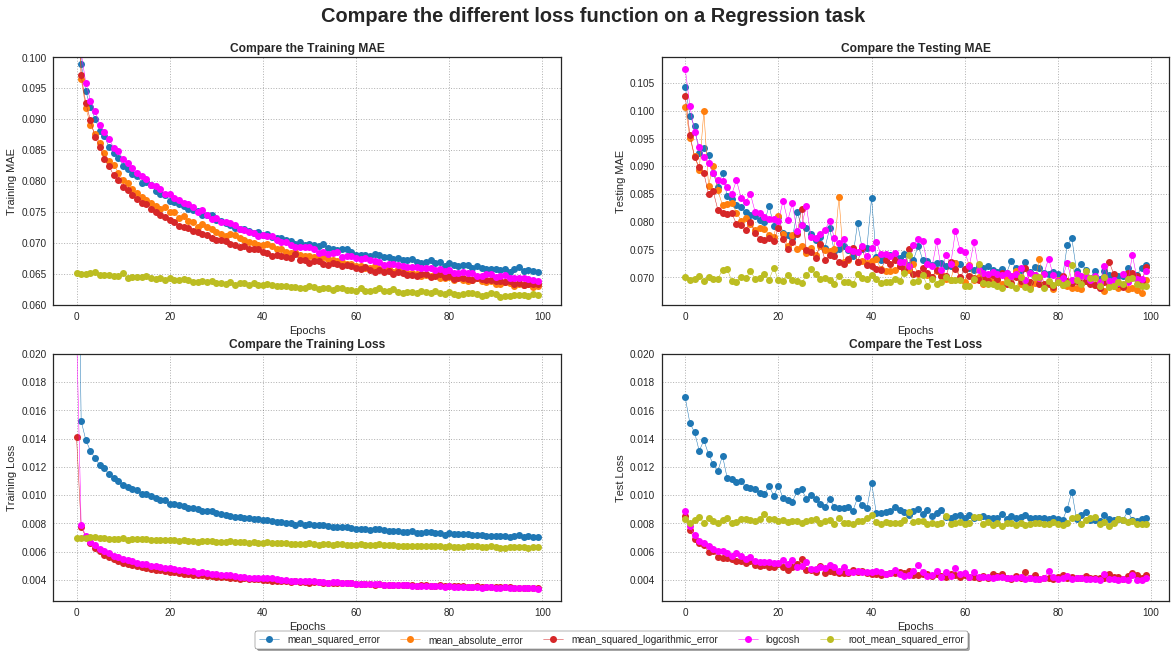

In [48]:
plt.style.use('seaborn-white')
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))

ax1.plot(model_1_history.history['mean_absolute_error'], linestyle='-', marker='o',color=colors[0],label='mean_squared_error')
ax1.plot(model_2_history.history['mean_absolute_error'], linestyle='-', marker='o',color=colors[1],label='mean_absolute_error')
ax1.plot(model_4_history.history['mean_absolute_error'], linestyle='-', marker='o',color=colors[3],label='mean_squared_logarithmic_error')
ax1.plot(model_8_history.history['mean_absolute_error'], linestyle='-', marker='o',color='fuchsia',label='logcosh')
ax1.plot(model_9_history.history['mean_absolute_error'], linestyle='-', marker='o',color=colors[8],label='root_mean_squared_error')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Training MAE')
ax1.set_ylim(0.06,0.10)
ax1.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax1.set_title('Compare the Training MAE',fontsize=12, fontweight='bold')

ax2.plot(model_1_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color=colors[0],label='mean_squared_error')
ax2.plot(model_2_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color=colors[1],label='mean_absolute_error')
ax2.plot(model_4_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color=colors[3],label='mean_squared_logarithmic_error')
ax2.plot(model_8_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color='fuchsia',label='logcosh')
ax2.plot(model_9_history.history['val_mean_absolute_error'], linestyle='-', marker='o',color=colors[8],label='root_mean_squared_error')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Testing MAE')
ax2.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax2.set_title('Compare the Testing MAE',fontsize=12, fontweight='bold')


ax3.plot(model_1_history.history['loss'], linestyle='-', marker='o',color=colors[0],label='mean_squared_error')
ax3.plot(model_2_history.history['loss'], linestyle='-', marker='o',color=colors[1],label='mean_absolute_error')
ax3.plot(model_4_history.history['loss'], linestyle='-', marker='o',color=colors[3],label='mean_squared_logarithmic_error')
ax3.plot(model_8_history.history['loss'], linestyle='-', marker='o',color='fuchsia',label='logcosh')
ax3.plot(model_9_history.history['loss'], linestyle='-', marker='o',color=colors[8],label='root_mean_squared_error')
ax3.set_xlabel('Epochs')
ax3.set_ylabel('Training Loss')
ax3.set_ylim(0.0025,0.02)
ax3.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax3.set_title('Compare the Training Loss',fontsize=12, fontweight='bold')

ax4.plot(model_1_history.history['val_loss'], linestyle='-', marker='o',color=colors[0],label='mean_squared_error')
ax4.plot(model_2_history.history['val_loss'], linestyle='-', marker='o',color=colors[1],label='mean_absolute_error')
ax4.plot(model_4_history.history['val_loss'], linestyle='-', marker='o',color=colors[3],label='mean_squared_logarithmic_error')
ax4.plot(model_8_history.history['val_loss'], linestyle='-', marker='o',color='fuchsia',label='logcosh')
ax4.plot(model_9_history.history['val_loss'], linestyle='-', marker='o',color=colors[8],label='root_mean_squared_error')
ax4.set_xlabel('Epochs')
ax4.set_ylabel('Test Loss')
ax4.set_ylim(0.0025,0.02)
ax4.grid(True,color='black',linestyle='dotted',linewidth=1,alpha=.3)
ax4.set_title('Compare the Test Loss',fontsize=12, fontweight='bold')

plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1),
          ncol=6, fancybox=True, shadow=True, frameon=True,edgecolor='black')


fig.suptitle('Compare the different loss function on a Regression task',fontsize=20, fontweight='bold',y=0.95)
plt.show()